Numeric columns for correlation:
 Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Anomaly Scores', 'Attack Type',
       'Attack Signature', 'Severity Level', 'Network Segment', 'Log Source'],
      dtype='object')


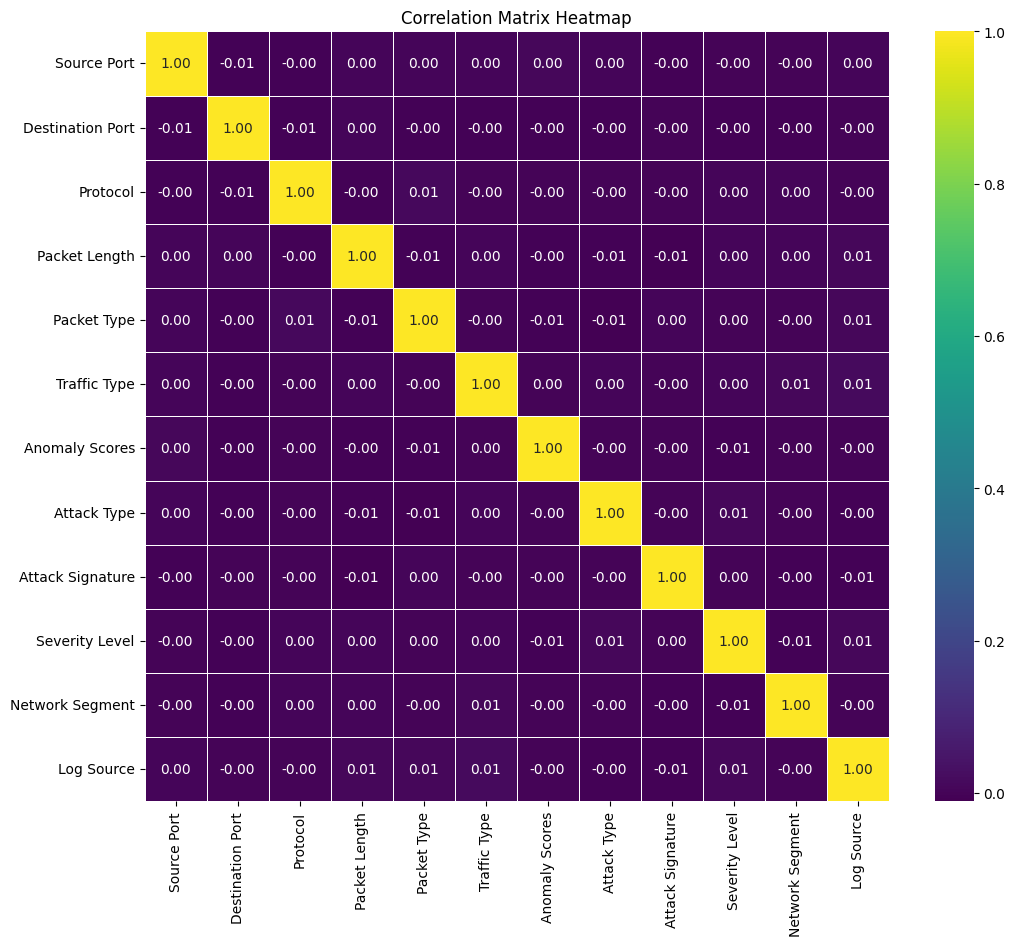

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37      4041
           1       0.33      0.33      0.33      3974
           2       0.34      0.30      0.32      3985

    accuracy                           0.34     12000
   macro avg       0.34      0.34      0.34     12000
weighted avg       0.34      0.34      0.34     12000

ROC AUC Score: 0.5041587362548802


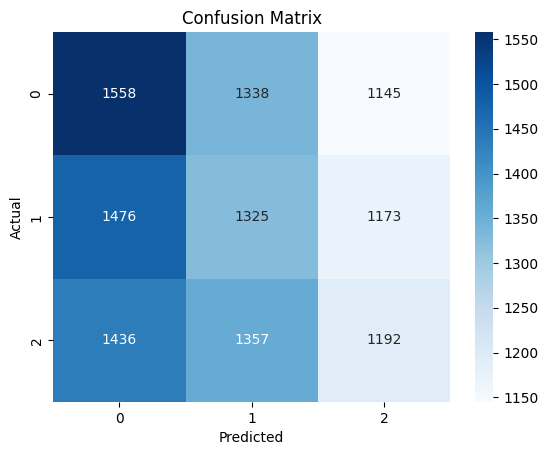

                  Importance
Destination Port    0.184766
Anomaly Scores      0.184159
Source Port         0.183598
Packet Length       0.182226
Traffic Type        0.040859
Attack Type         0.040117
Severity Level      0.039834
Protocol            0.039532
Network Segment     0.035826
Log Source          0.023680
Attack Signature    0.023373
Packet Type         0.022031


<ipython-input-1-f5bc693afebc>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')


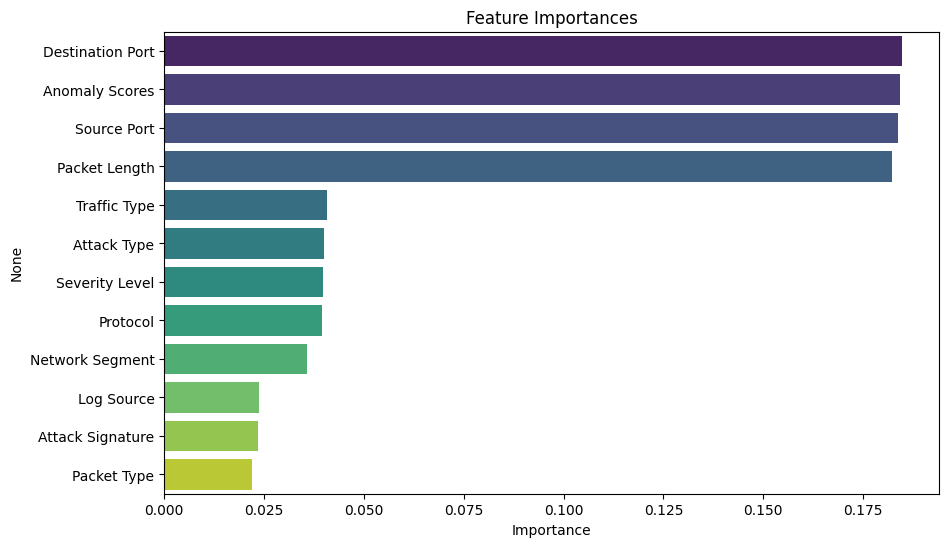

In [1]:
# AI-Driven Predictive Analytics for Security Breaches
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 2: Load Data
data = pd.read_csv('cybersecurity_attacks.csv')

# Step 3: Data Cleaning
# Dropping columns that are not directly useful or contain too many missing values
# Assuming 'Action Taken' as the target column for prediction
data.drop(['Timestamp', 'Source IP Address', 'Destination IP Address',
           'Payload Data', 'User Information', 'Device Information',
           'Geo-location Data', 'Proxy Information', 'Firewall Logs',
           'IDS/IPS Alerts', 'Malware Indicators', 'Alerts/Warnings'], axis=1, inplace=True)

# Convert categorical data to numerical using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Action Taken':  # 'Action Taken' is our target
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Step 4: Exploratory Data Analysis (EDA)
# Filter only numeric data for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Check the columns that are included in the correlation matrix
print("Numeric columns for correlation:\n", numeric_data.columns)

# Correlation Heatmap to understand relationships between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 5: Feature Engineering and Preprocessing
# Define features (X) and target variable (y)
X = data.drop('Action Taken', axis=1)
y = LabelEncoder().fit_transform(data['Action Taken'])  # Encoding target variable

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 7: Model Development
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.show()